<a href="https://colab.research.google.com/github/Guhenriquetorres/Analise_de_Votos_PR_2022/blob/main/votacao_partido_munzona_2022_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 . ETL**





In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Votos_PR_2022 = pd.read_csv('/content/drive/MyDrive/votacao_partido_munzona_2022_PR.csv', sep = ';', encoding = 'Windows-1252')
df = Votos_PR_2022

In [ ]:
df['QT_VOTOS_LEGENDA_VALIDOS'] = pd.to_numeric(df['QT_VOTOS_LEGENDA_VALIDOS'])
df['QT_VOTOS_NOMINAIS_CONVR_LEG'] = pd.to_numeric(df['QT_VOTOS_NOMINAIS_CONVR_LEG'])
df['QT_TOTAL_VOTOS_LEG_VALIDOS'] = pd.to_numeric(df['QT_TOTAL_VOTOS_LEG_VALIDOS'])
df['QT_VOTOS_NOMINAIS_VALIDOS'] = pd.to_numeric(df['QT_VOTOS_NOMINAIS_VALIDOS'])
df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'] = pd.to_numeric(df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'])
df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'] = pd.to_numeric(df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'])

In [ ]:
#Criação da Coluna Calculada
df['QT_TOTAL_VOTOS_VALIDOS'] = df['QT_VOTOS_LEGENDA_VALIDOS'] + df['QT_VOTOS_NOMINAIS_CONVR_LEG'] + df['QT_VOTOS_NOMINAIS_VALIDOS'] - df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'] - df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD']

#Limpeza dos Dados Negativos

In [ ]:
#Fórmula para gerar a nova coluna
df["QT_TOTAL_VOTOS_VALIDOS"] = (df['QT_VOTOS_LEGENDA_VALIDOS'] +
df['QT_VOTOS_NOMINAIS_CONVR_LEG'] +
df['QT_VOTOS_NOMINAIS_VALIDOS'] -
df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'] -
df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'])

#Limpeza dos dados negativos da coluna
def restricao(valor):
    if valor < 0:
        return 0
    return valor

df['QT_TOTAL_VOTOS_VALIDOS'] = df['QT_TOTAL_VOTOS_VALIDOS'].apply(restricao)

In [ ]:
df = Votos_PR_2022

In [ ]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_LEGENDA_VALIDOS,QT_VOTOS_NOMINAIS_CONVR_LEG,QT_TOTAL_VOTOS_LEG_VALIDOS,QT_VOTOS_NOMINAIS_VALIDOS,QT_VOTOS_LEGENDA_ANUL_SUBJUD,QT_VOTOS_NOMINAIS_ANUL_SUBJUD,QT_TOTAL_VOTOS_VALIDOS
0,11/05/2023,19:40:17,2022,2,Eleição Ordinária,1,546,Eleições Gerais Estaduais 2022,02/10/2022,E,...,PARTIDO ISOLADO,PATRIOTA,N,1,0,1,7,0,0,8
1,11/05/2023,19:40:17,2022,2,Eleição Ordinária,1,546,Eleições Gerais Estaduais 2022,02/10/2022,E,...,PARTIDO ISOLADO,AGIR,N,0,0,0,0,0,0,0
2,11/05/2023,19:40:17,2022,2,Eleição Ordinária,1,546,Eleições Gerais Estaduais 2022,02/10/2022,E,...,FEDERAÇÃO,PT / PV / PC do B,N,0,0,0,0,0,0,0
3,11/05/2023,19:40:17,2022,2,Eleição Ordinária,1,546,Eleições Gerais Estaduais 2022,02/10/2022,E,...,FEDERAÇÃO,CIDADANIA / PSDB,N,1,0,1,33,0,15,19
4,11/05/2023,19:40:17,2022,2,Eleição Ordinária,1,546,Eleições Gerais Estaduais 2022,02/10/2022,E,...,FEDERAÇÃO,REDE / PSOL,N,1,0,1,17,0,0,18


In [ ]:
print(df.dtypes)

DT_GERACAO                       object
HH_GERACAO                       object
ANO_ELEICAO                       int64
CD_TIPO_ELEICAO                   int64
NM_TIPO_ELEICAO                  object
NR_TURNO                          int64
CD_ELEICAO                        int64
DS_ELEICAO                       object
DT_ELEICAO                       object
TP_ABRANGENCIA                   object
SG_UF                            object
SG_UE                            object
NM_UE                            object
CD_MUNICIPIO                      int64
NM_MUNICIPIO                     object
NR_ZONA                           int64
CD_CARGO                          int64
DS_CARGO                         object
TP_AGREMIACAO                    object
NR_PARTIDO                        int64
SG_PARTIDO                       object
NM_PARTIDO                       object
NR_FEDERACAO                      int64
NM_FEDERACAO                     object
SG_FEDERACAO                     object


# **2.TABELA DINÂMICA**

In [ ]:
Tdinamica = pd.crosstab(
    index=df['SG_PARTIDO'],
    columns=[df['DS_CARGO'], df['NR_TURNO']],
    values=df['QT_TOTAL_VOTOS_VALIDOS'],
    aggfunc=np.sum
)
print(Tdinamica)

DS_CARGO      Deputado Estadual Deputado Federal Governador    Senador
NR_TURNO                      1                1          1          1
SG_PARTIDO                                                            
AGIR                    28015.0          14141.0        NaN        NaN
CIDADANIA              124626.0          89330.0        NaN        NaN
DC                      15469.0          31099.0    50729.0        NaN
MDB                    248621.0         273228.0        NaN    63784.0
NOVO                    74996.0          68292.0        NaN        NaN
PATRIOTA                12974.0           9678.0        NaN        NaN
PC do B                  6316.0           8268.0        NaN        NaN
PCB                         NaN           6280.0    13577.0        NaN
PCO                       420.0            187.0     2096.0     3402.0
PDT                    131105.0          90644.0   126945.0   130520.0
PL                     508763.0         593160.0        NaN  1697962.0
PMB   

In [ ]:
# Criação da Tabela Dinâmica para Plot de Gráficos Futuros
Tabela_de_Referencia_Cruzada = pd.pivot_table(df, values='QT_TOTAL_VOTOS_VALIDOS', index='NM_PARTIDO', columns='DS_CARGO', aggfunc='sum')

# Exibir a tabela dinâmica
print(Tabela_de_Referencia_Cruzada)

DS_CARGO                                        Deputado Estadual  \
NM_PARTIDO                                                          
AGIR                                                      28015.0   
Cidadania                                                124626.0   
Democracia Cristã                                         15469.0   
Movimento Democrático Brasileiro                         248621.0   
PROGRESSISTAS                                            484051.0   
Partido Comunista Brasileiro                                  NaN   
Partido Comunista do Brasil                                6316.0   
Partido Democrático Trabalhista                          131105.0   
Partido Liberal                                          508763.0   
Partido Novo                                              74996.0   
Partido Renovador Trabalhista Brasileiro                   4331.0   
Partido Republicano da Ordem Social                      216803.0   
Partido Social Cristão            

In [ ]:
# Tabela de Referencia Cruzada com uma vizualização mais agradável
Tdinamica = pd.crosstab(df['NM_PARTIDO'],df['DS_CARGO'],values = df['QT_TOTAL_VOTOS_VALIDOS'], aggfunc = np.sum)
Tdinamica

DS_CARGO,Deputado Estadual,Deputado Federal,Governador,Senador
NM_PARTIDO,,,,
AGIR,28015.0,14141.0,NaN,NaN
Cidadania,124626.0,89330.0,NaN,NaN
Democracia Cristã,15469.0,31099.0,50729.0,NaN
Movimento Democrático Brasileiro,248621.0,273228.0,NaN,63784.0
PROGRESSISTAS,484051.0,703686.0,NaN,NaN
Partido Comunista Brasileiro,NaN,6280.0,13577.0,NaN
Partido Comunista do Brasil,6316.0,8268.0,NaN,NaN
Partido Democrático Trabalhista,131105.0,90644.0,126945.0,130520.0
Partido Liberal,508763.0,593160.0,NaN,1697962.0


In [ ]:
#Aferindo as informações
soma_total = df['QT_TOTAL_VOTOS_VALIDOS'].sum()
print(soma_total)

23999618


# **3.GRÁFICO DE BARRAS**

                                         QT_TOTAL_VOTOS_VALIDOS
NM_PARTIDO                                                     
Partido da Mulher Brasileira                              60232
Democracia Cristã                                         97297
Partido Socialismo e Liberdade                           100759
Partido Trabalhista Brasileiro                           119514
Partido Novo                                             143288
Cidadania                                                213956
Solidariedade                                            250764
Partido da Social Democracia Brasileira                  278971
Partido Socialista Brasileiro                            298689
Partido Democrático Trabalhista                          479214
Partido Republicano da Ordem Social                      520399
Movimento Democrático Brasileiro                         585633
REPUBLICANOS                                             637927
Partido Verde                           

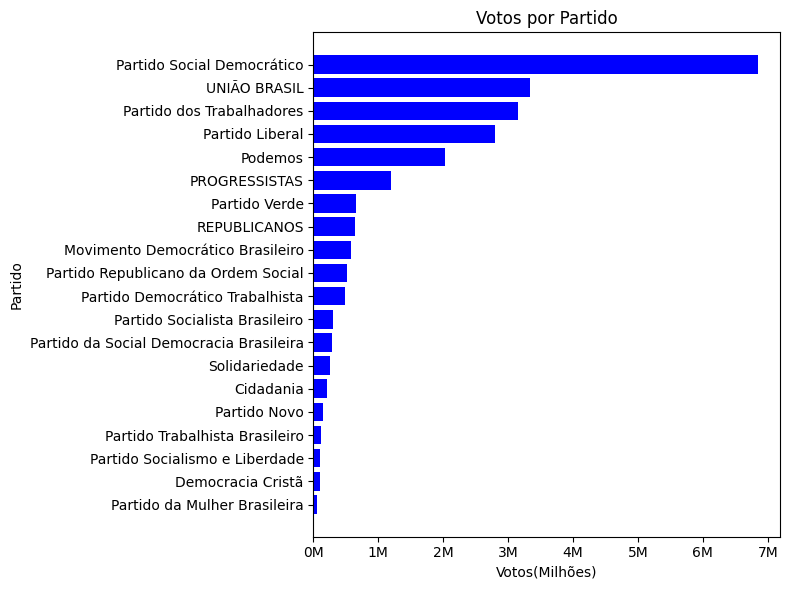

In [ ]:
# Criar a tabela dinâmica
Tabela_de_Referencia_Cruzada = pd.pivot_table(df, values='QT_TOTAL_VOTOS_VALIDOS', index='NM_PARTIDO', aggfunc='sum')
# Ordenar os valores em ordem decrescente
Tabela_de_Referencia_Cruzada = Tabela_de_Referencia_Cruzada.sort_values(by='QT_TOTAL_VOTOS_VALIDOS', ascending=True)
Tabela_de_Referencia_Cruzada = Tabela_de_Referencia_Cruzada[10:]
print(Tabela_de_Referencia_Cruzada)
# Plot do gráfico
plt.figure(figsize=(8, 6))
plt.barh(Tabela_de_Referencia_Cruzada.index, Tabela_de_Referencia_Cruzada['QT_TOTAL_VOTOS_VALIDOS'], color='blue')
plt.title('Votos por Partido')
plt.xlabel('Votos(Milhões)')
plt.ylabel('Partido')

# Definir ticks de 0 a 7 milhões com incremento de 1 milhões
ticks = range(0, 7000001, 1000000)
 # Formatar os ticks para exibição em milhões
labels = ['{:,.0f}'.format(x/1000000) + 'M' for x in ticks]
plt.xticks(ticks, labels)

plt.tight_layout()
plt.show()



                                       QT_TOTAL_VOTOS_VALIDOS
NM_COLIGACAO                                                 
A MUDANÇA NÃO PARA. PRA FRENTE PARANÁ                 4243292
Coligação Por Amor Ao Paraná                          1396089
FEDERAÇÃO                                             4446901
PARTIDO ISOLADO                                      13913336


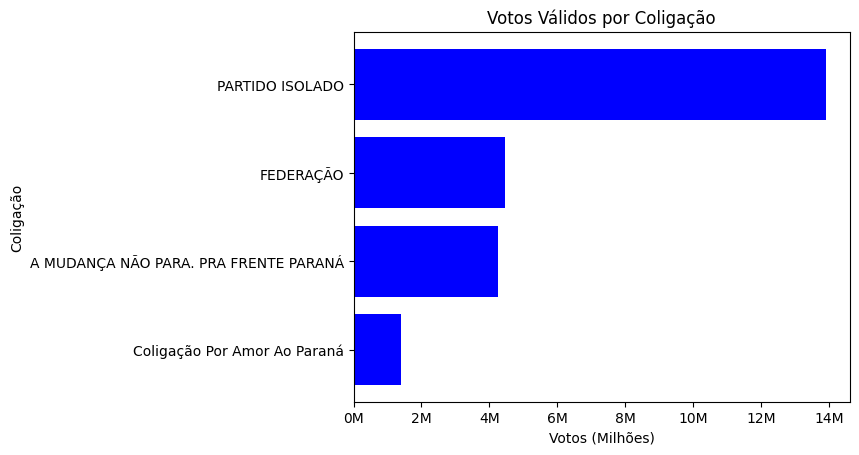

In [ ]:
# Criar a tabela dinâmica
Tabela_de_Referencia_Cruzada2 = pd.pivot_table(df, values='QT_TOTAL_VOTOS_VALIDOS', index='NM_COLIGACAO', aggfunc='sum')
print(Tabela_de_Referencia_Cruzada2)

# Ordenar os valores em ordem decrescente
Tabela_de_Referencia_Cruzada2 = Tabela_de_Referencia_Cruzada2.sort_values(by='QT_TOTAL_VOTOS_VALIDOS', ascending=True)

# Plot do gráfico
plt.barh(Tabela_de_Referencia_Cruzada2.index, Tabela_de_Referencia_Cruzada2['QT_TOTAL_VOTOS_VALIDOS'], color='blue')
plt.title('Votos Válidos por Coligação')
plt.xlabel('Votos (Milhões)')
plt.ylabel('Coligação')

# Definir ticks de 0 a 10 milhões com incremento de 2 milhões
ticks = range(0, 14000001, 2000000)
 # Formatar os ticks para exibição em milhões
labels = ['{:,.0f}'.format(x/1000000) + 'M' for x in ticks]
plt.xticks(ticks, labels)
plt.show()


# **4.HISTOGRAMA**


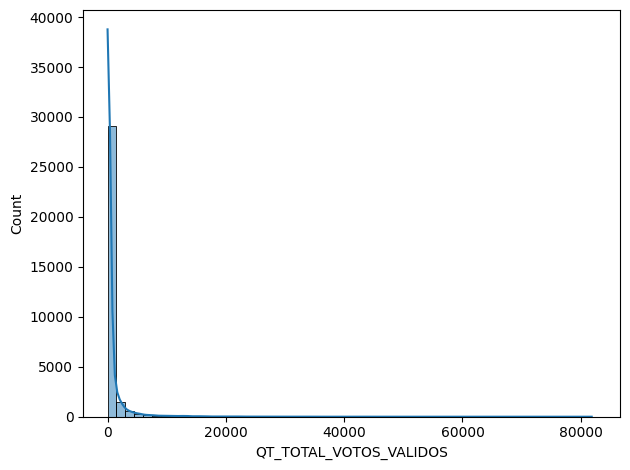

In [ ]:
# Plot do histograma com um binwidth de 10000 valores
sns.histplot(data=df, x="QT_TOTAL_VOTOS_VALIDOS", kde=True, binwidth=1500)
# Exibir o gráfico
plt.tight_layout()
plt.show()


# **5. BOX PLOTER**

                                       QT_TOTAL_VOTOS_VALIDOS
NM_COLIGACAO                                                 
Coligação Por Amor Ao Paraná                          1396089
A MUDANÇA NÃO PARA. PRA FRENTE PARANÁ                 4243292
FEDERAÇÃO                                             4446901
PARTIDO ISOLADO                                      13913336


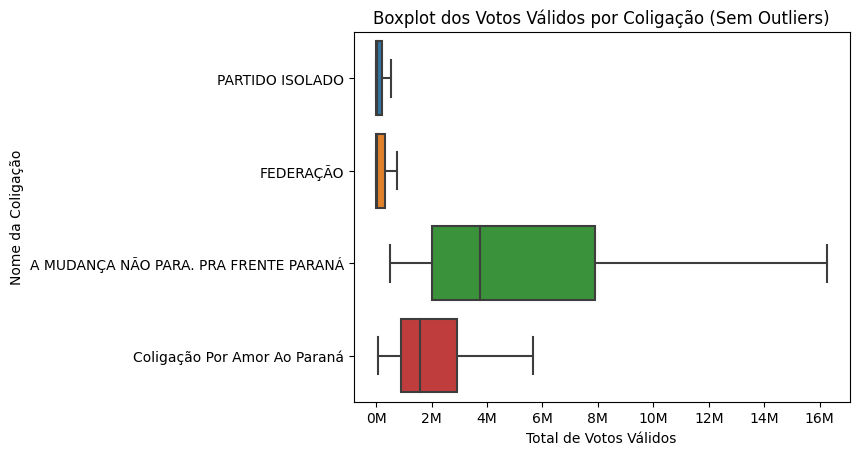

In [ ]:
print(Tabela_de_Referencia_Cruzada2)

sns.boxplot(data=df, x="QT_TOTAL_VOTOS_VALIDOS", y="NM_COLIGACAO", showfliers=False)

# Adicionar rótulos e título
plt.xlabel('Total de Votos Válidos')
plt.ylabel('Nome da Coligação')
plt.title('Boxplot dos Votos Válidos por Coligação (Sem Outliers)')

# Definir ticks de 0 a 10 milhões com incremento de 2 milhões
ticks = range(0, 16001, 2000)
 # Formatar os ticks para exibição em milhões
labels = ['{:,.0f}'.format(x/1000) + 'M' for x in ticks]
plt.xticks(ticks, labels)

# Exibir o gráfico
plt.show()
